In [26]:
import pandas as pd
df = pd.read_csv('inventory_clean.csv')
df.head()

,Unnamed: 0,ref_number,title_en,description_en,publisher_en,date_published,language,size,eligible_for_release,program_alignment_architecture_en,portal_url_en,user_votes,owner_org,owner_org_title
0,2,ODI-2016-00059,Association Members,This resource lists the number of members for ...,Agriculture and Agri-Food Canada,2017-02-01,en+fr,0,Y,"Market Access, Negotiations, Sector Competitiv...",http://open.canada.ca/data/en/dataset/dee0a606...,2,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
1,7,ODI-2016-00066,Canadian Cheese Directory,A comprehensive database dedicated solely to C...,Agriculture and Agri-Food Canada,2015-02-09,en+fr,500,Y,"Market Access, Negotiations, Sector Competitiv...",http://open.canada.ca/data/en/dataset/3c16cd48...,11,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
2,11,ODI-2016-00075,Access to Information (ATI) Summaries,"Lists of all completed ATI requests, by month ...",Agriculture and Agri-Food Canada,NaN,en+fr,10000,Y,Communication Services,http://open.canada.ca/data/en/dataset/0797e893...,2,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
3,37,ODI-2016-00141,Agri-Environmental Indicator (AEI) - Livestock...,The “Agri-Environmental Indicator (AEI) - Live...,Agriculture and Agri-Food Canada,2016-07-11,en+fr,0,Y,"Science, Innovation, Adoption and Sustainability",http://open.canada.ca/data/en/dataset/96271546...,2,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
4,39,ODI-2016-00124,AAFC Annual Unit Runoff in Canada - 2013,The “AAFC Annual Unit Runoff in Canada - 2013”...,Agriculture and Agri-Food Canada,2013-05-29,en+fr,0,Y,"Science, Innovation, Adoption and Sustainability",http://open.canada.ca/data/en/dataset/a905bafc...,3,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...


In [27]:
from io import StringIO
col = ['publisher_en', 'description_en']
df = df[col]
df = df[pd.notnull(df['description_en'])]
df = df[pd.notnull(df['publisher_en'])]
df.columns = ['publisher_en', 'description_en']
df['category_id'] = df['publisher_en'].factorize()[0]
category_id_df = df[['publisher_en', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'publisher_en']].values)
df.head()

,publisher_en,description_en,category_id
0,Agriculture and Agri-Food Canada,This resource lists the number of members for ...,0
1,Agriculture and Agri-Food Canada,A comprehensive database dedicated solely to C...,0
2,Agriculture and Agri-Food Canada,"Lists of all completed ATI requests, by month ...",0
3,Agriculture and Agri-Food Canada,The “Agri-Environmental Indicator (AEI) - Live...,0
4,Agriculture and Agri-Food Canada,The “AAFC Annual Unit Runoff in Canada - 2013”...,0


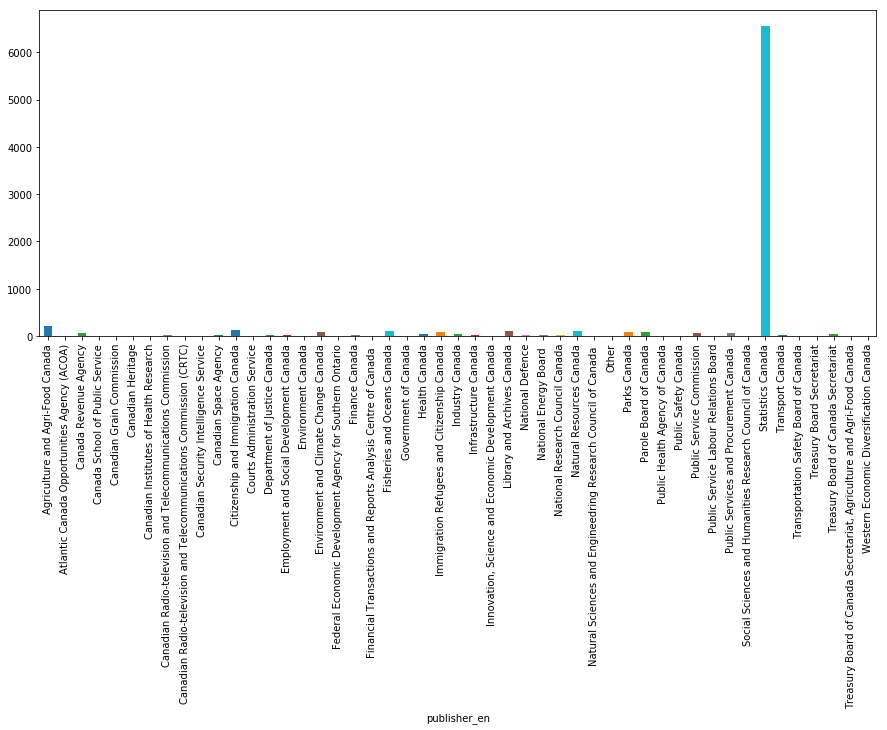

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))
df.groupby('publisher_en').description_en.count().plot.bar(ylim=0)
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.description_en).toarray()
labels = df.category_id
features.shape

(8234, 7588)

In [33]:
from sklearn.feature_selection import chi2
import numpy as np
N = 4
for publisher_en, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(publisher_en))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Agriculture and Agri-Food Canada':
  . Most correlated unigrams:
. aafc
. agri
. agricultural
. soil
  . Most correlated bigrams:
. soil landscapes
. indicator aei
. environmental indicator
. agri environmental
# 'Atlantic Canada Opportunities Agency (ACOA)':
  . Most correlated unigrams:
. agency
. atlantic
. requests
. summaries
  . Most correlated bigrams:
. canada based
. tables present
. levels geography
. access information
# 'Canada Revenue Agency':
  . Most correlated unigrams:
. reassessed
. gst
. returns
. tax
  . Most correlated bigrams:
. returns assessed
. tax year
. gst hst
. tax benefit
# 'Canada School of Public Service':
  . Most correlated unigrams:
. employees
. delivery
. equity
. fiscal
  . Most correlated bigrams:
. total number
. fiscal year
. employees employment
. public service
# 'Canadian Grain Commission':
  . Most correlated unigrams:
. exported
. movement
. feed
. grains
  . Most correlated bigrams:
. levels geography
. data weekly
. crop year
. year da

# 'Public Services and Procurement Canada ':
  . Most correlated unigrams:
. library
. fiscal
. procurement
. receiver
  . Most correlated bigrams:
. information published
. accounts dataset
. receiver general
. public accounts
# 'Social Sciences and Humanities Research Council of Canada':
  . Most correlated unigrams:
. applicant
. administered
. awarded
. discipline
  . Most correlated bigrams:
. tables present
. levels geography
. fiscal year
. data file
# 'Statistics Canada':
  . Most correlated unigrams:
. datasets
. data
. dataset
. available
  . Most correlated bigrams:
. work permit
. review type
. note datasets
. dataset provides
# 'Transport Canada':
  . Most correlated unigrams:
. mark
. registered
. csa
. tc
  . Most correlated bigrams:
. data set
. motor vehicle
. transport canada
. registered standard
# 'Transportation Safety Board of Canada':
  . Most correlated unigrams:
. deficiencies
. safety
. occurrences
. tsb
  . Most correlated bigrams:
. federally regulated
. sum

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['description_en'], df['publisher_en'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [38]:
print(clf.predict(count_vect.transform(["Monthly Long-Term Average Minimum Temperature represents the average minimum monthly temperature reached in a given area for each month averaged across a 30 yr. period (1971-2000). These values are calculated across Canada in 10x10 km cells."])))

['Agriculture and Agri-Food Canada']


/home/bking/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/bking/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/bking/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/bking/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 membe

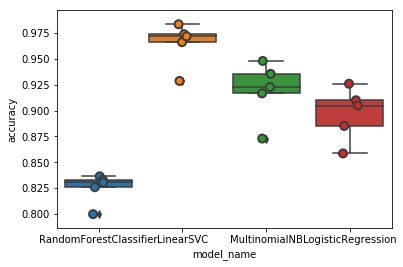

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [40]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.964798
LogisticRegression        0.896945
MultinomialNB             0.919174
RandomForestClassifier    0.825208
Name: accuracy, dtype: float64

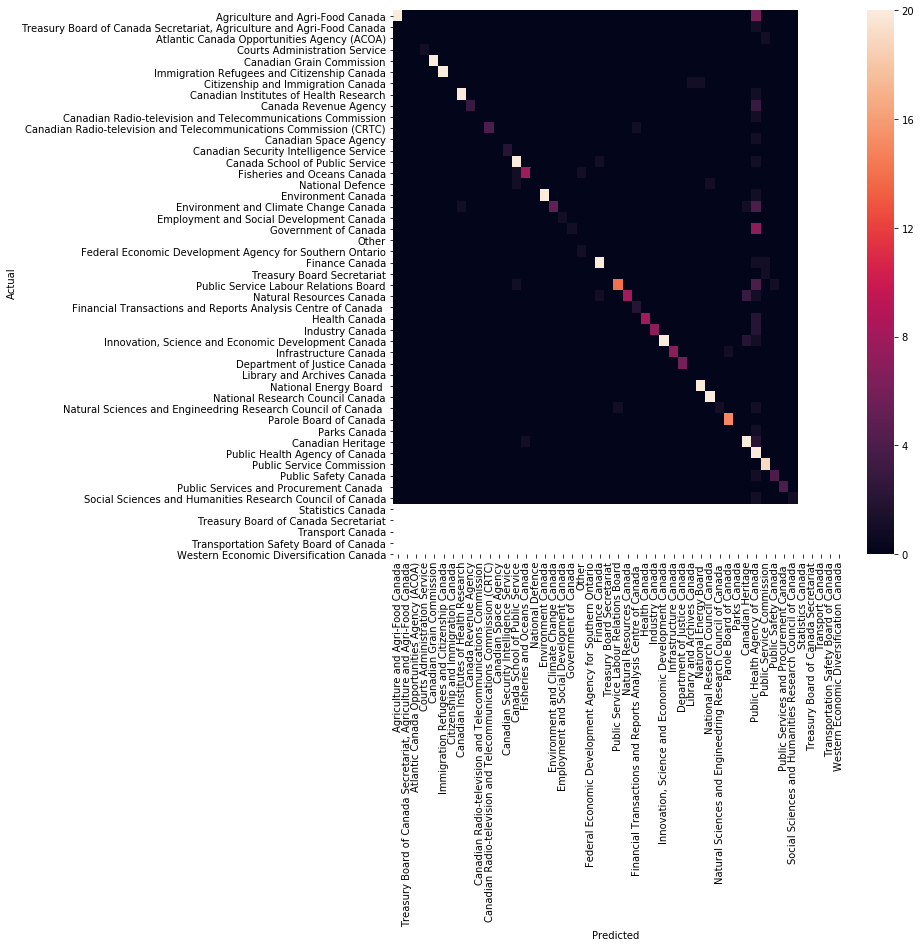

In [60]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, vmin=0, vmax=20, annot=False, fmt='d',
            xticklabels=category_id_df.publisher_en.values, yticklabels=category_id_df.publisher_en.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [61]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['publisher_en', 'description_en']])
      print('')

IndexError: index 44 is out of bounds for axis 0 with size 44

In [63]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(publisher_en))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Western Economic Diversification Canada':
  . Top unigrams:
       . soil
       . aafc
  . Top bigrams:
       . lidar data
       . extent canada
# 'Western Economic Diversification Canada':
  . Top unigrams:
       . atlantic
       . agency
  . Top bigrams:
       . access information
       . industrial classification
# 'Western Economic Diversification Canada':
  . Top unigrams:
       . tax
       . benefit
  . Top bigrams:
       . gst hst
       . list canadian
# 'Western Economic Diversification Canada':
  . Top unigrams:
       . school
       . fiscal
  . Top bigrams:
       . public service
       . fiscal year
# 'Western Economic Diversification Canada':
  . Top unigrams:
       . date
       . feed
  . Top bigrams:
       . year date
       . data weekly
# 'Western Economic Diversification Canada':
  . Top unigrams:
       . concerning
       . mandatory
  . Top bigrams:
       . service canada
       . public service
# 'Western Economic Diversification Canada':
  . T

In [64]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['publisher_en'].unique()))

                                                                        precision    recall  f1-score   support

                                      Agriculture and Agri-Food Canada       1.00      0.93      0.96        85
Treasury Board of Canada Secretariat, Agriculture and Agri-Food Canada       0.00      0.00      0.00         1
                           Atlantic Canada Opportunities Agency (ACOA)       0.00      0.00      0.00         1
                                         Courts Administration Service       1.00      1.00      1.00         1
                                             Canadian Grain Commission       1.00      1.00      1.00        33
                           Immigration Refugees and Citizenship Canada       1.00      1.00      1.00        42
                                    Citizenship and Immigration Canada       0.00      0.00      0.00         2
                                Canadian Institutes of Health Research       0.96      0.96      0.96  

/home/bking/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1428: UserWarning: labels size, 44, does not match size of target_names, 49
  .format(len(labels), len(target_names))
/home/bking/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/bking/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
